Morphological Operators:
performs various effects like:
1. Reducing Noise
2. Blurring & Smoothing
3. Reducing black points
4. Erosion & Dilation effect
5. Add/Erode from existing image

In [84]:
#these effects are mostly seen on text data.
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [85]:
def load_img():
    blank_img = np.zeros((600,600), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, "ABCDE", org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=25)
    return blank_img

In [86]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

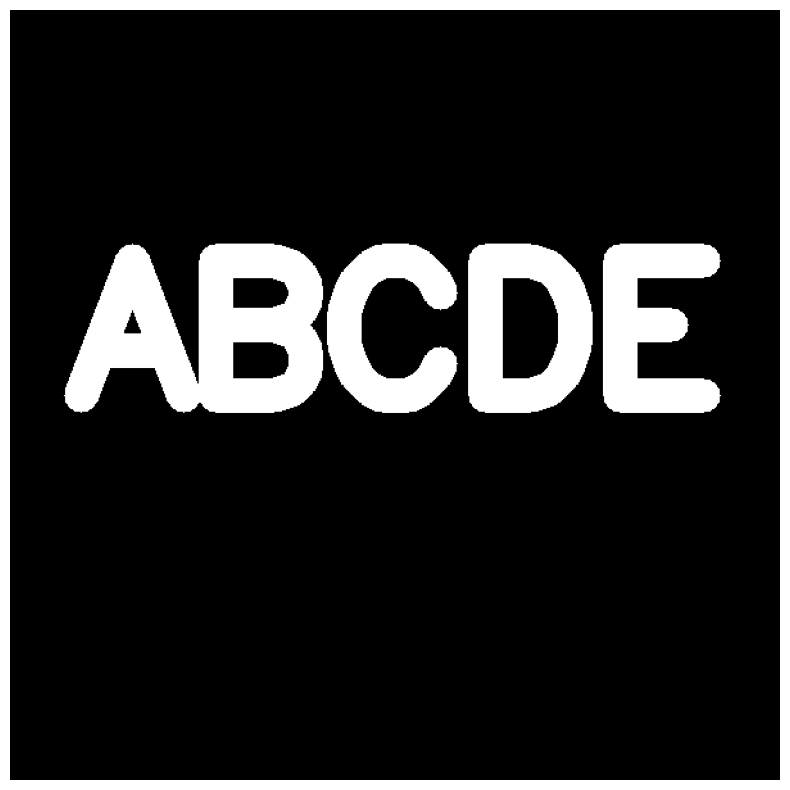

In [87]:
img = load_img()
display_img(img)

### EROSION:

Erosion:

it is a Morphological Operator.
it erodes away boundaries of foreground objects.(majorly letters)

letters - in foreground
black is general background

kernel is used to detect these edges between our foreground text and background.

In [88]:
kernel = np.ones((5,5),dtype=np.uint8)

kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [89]:
#now using this kernel doing erosion
#here iterations is no.of passes

res_img = cv2.erode(img, kernel, iterations=1)

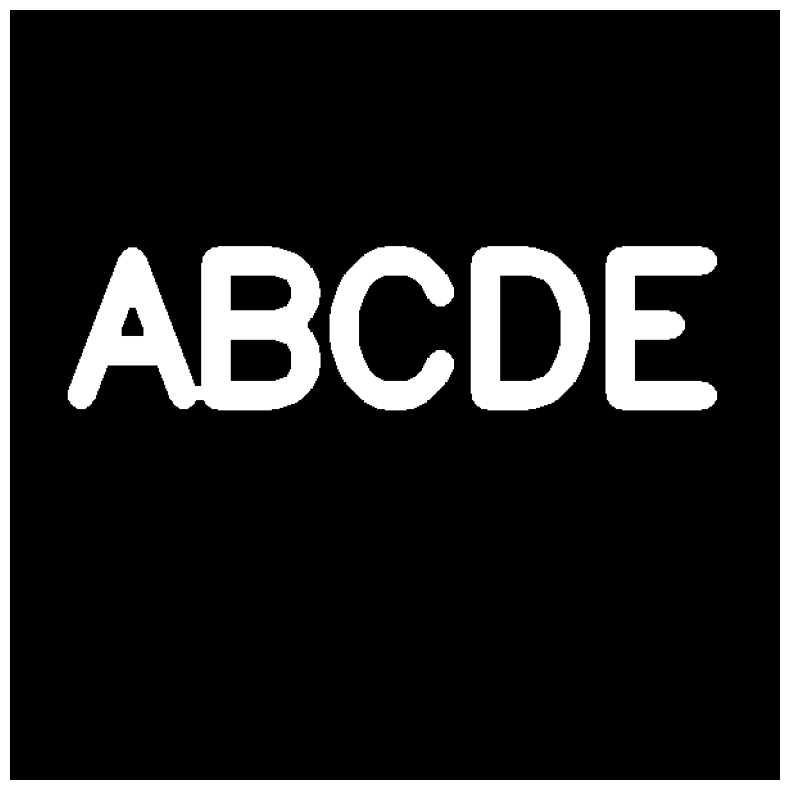

In [90]:
display_img(res_img)

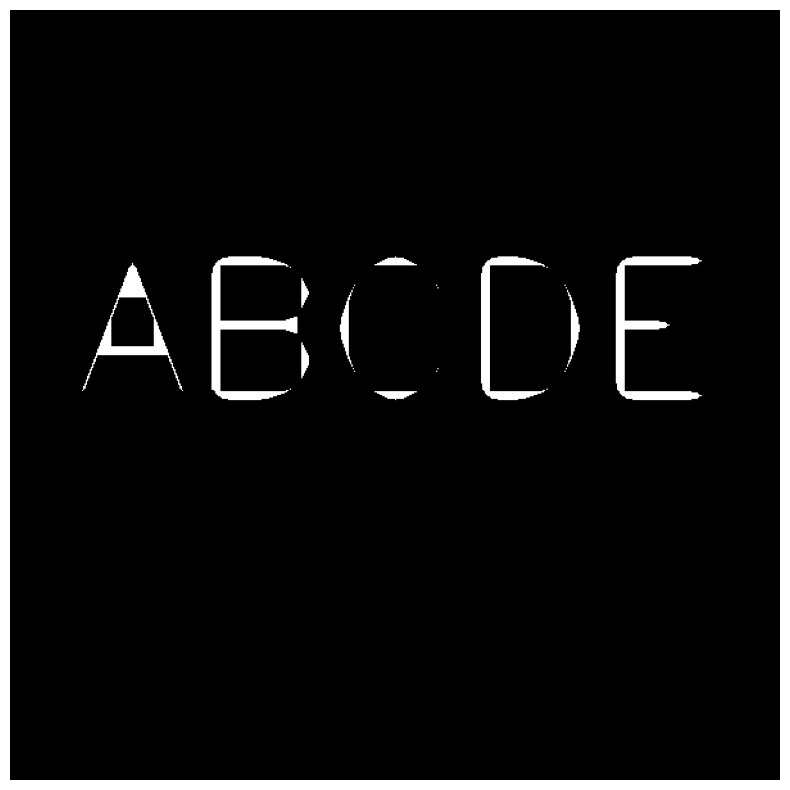

In [91]:
#now playing with erosion parameters

res_img = cv2.erode(img, kernel, iterations=5)
display_img(res_img)


In [92]:
#so foreground part is getting eroded.



### Opening:

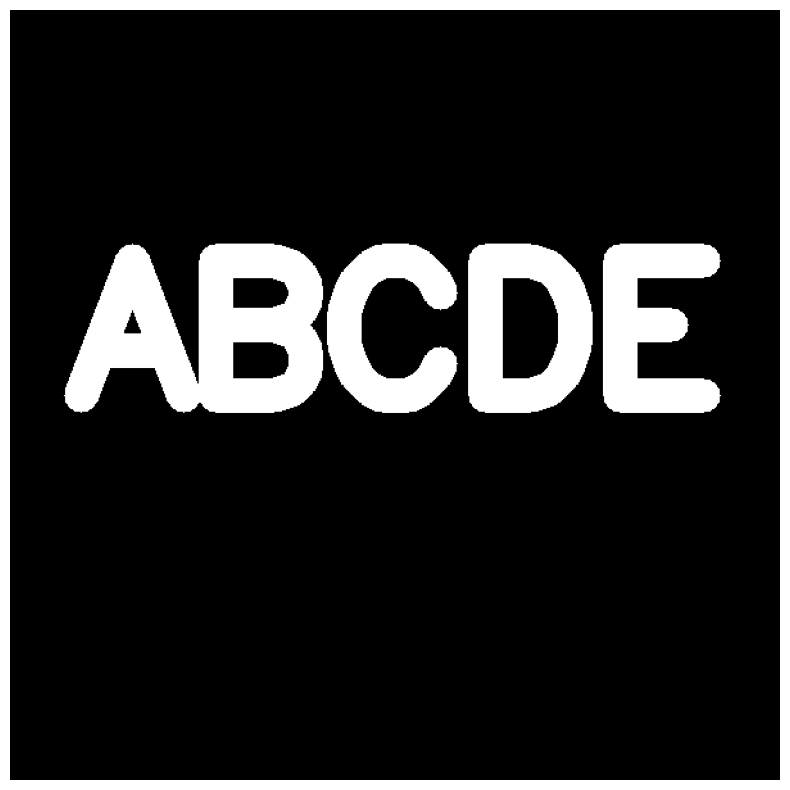

In [93]:
#opening is erosion followed by dilation(opposite of erosion)-adding more to forground
#so, opening helps to remove background noise

img = load_img()
display_img(img)

#adding noise:(0 & 1's)-random
white_noise_img = np.random.randint(low=0, high=2, size=(600,600), dtype=np.uint8)
#background noise

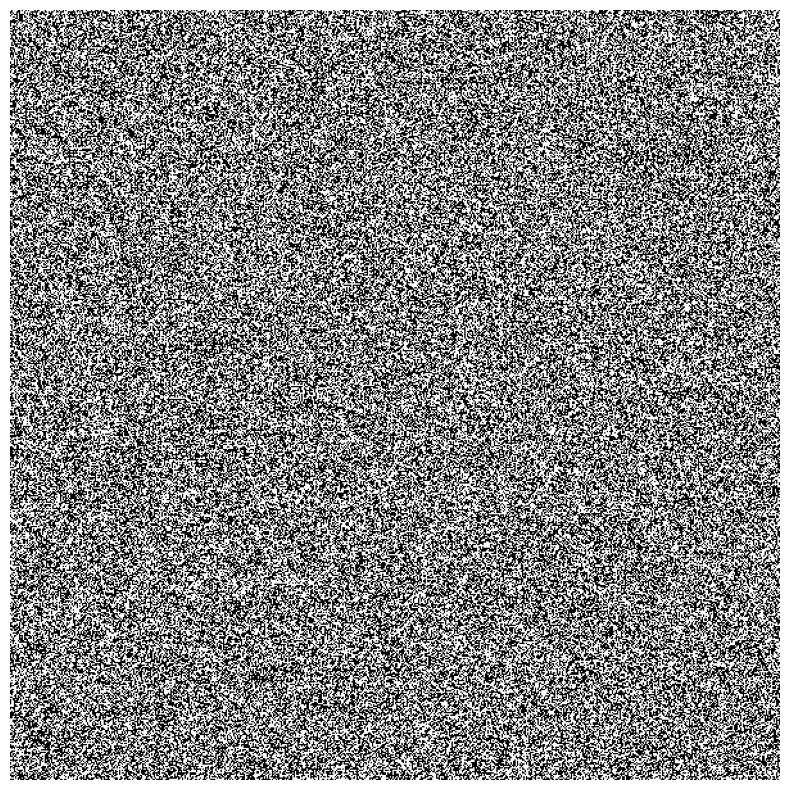

In [94]:
display_img(white_noise_img)

In [95]:
#noise image

img.max()

255

In [96]:
img.min()

0

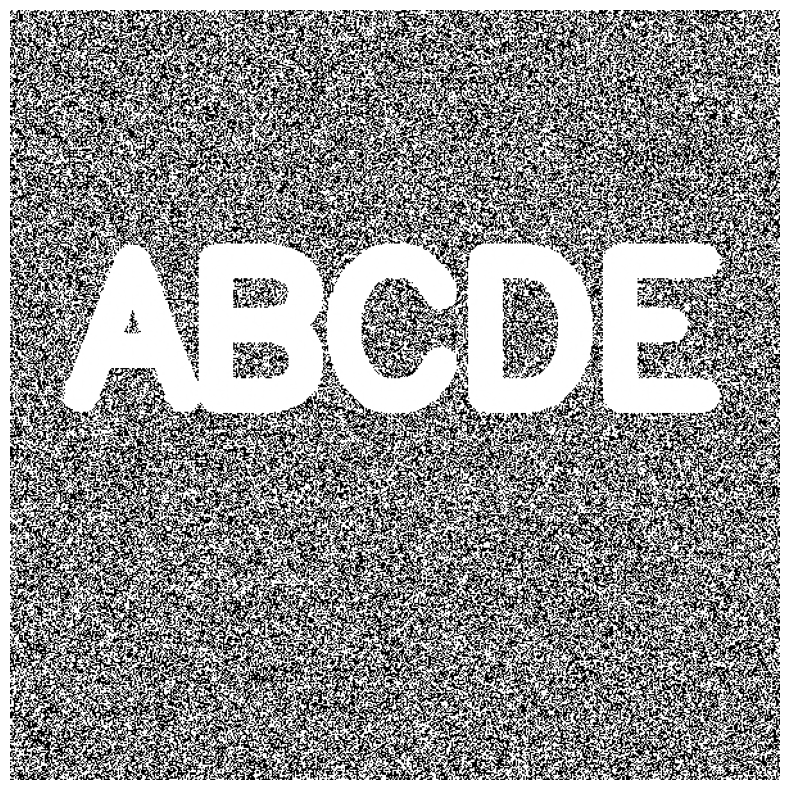

In [97]:
#converting noiseimage to 0-255 scale samer as image.

white_noise_img=white_noise_img*255

#multiplying by 255 doesn't change white forground.

#0-1 to 0-255

#adding images - lot of noise

noise_img = white_noise_img+img

display_img(noise_img)

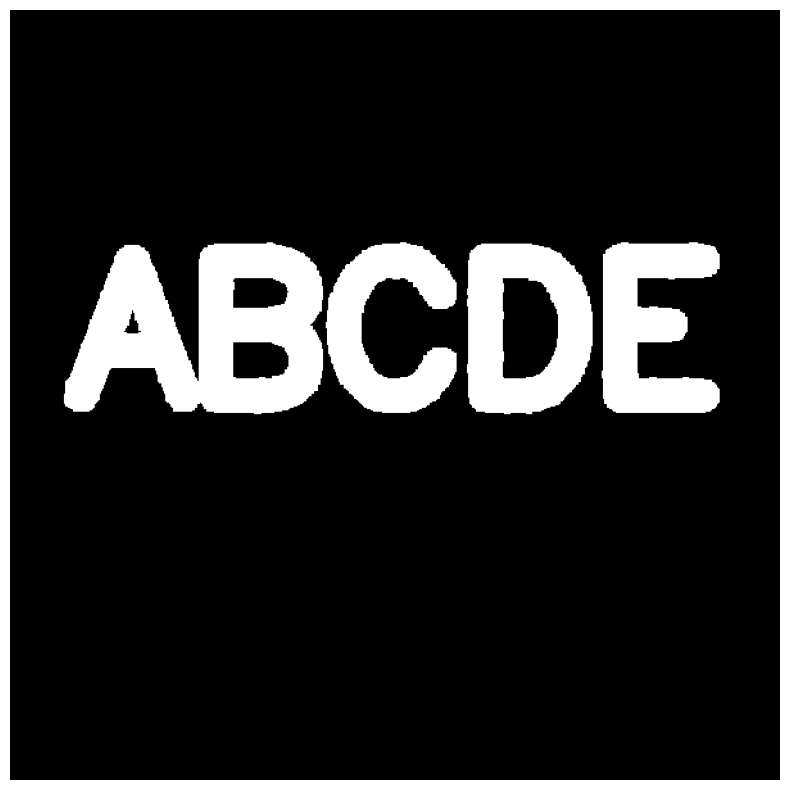

In [98]:
#using opening for dilation and reduce noise
#cv2.MORPH_OPEN-opening method

opening_img = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

display_img(opening_img)
#this can clear lot of noise

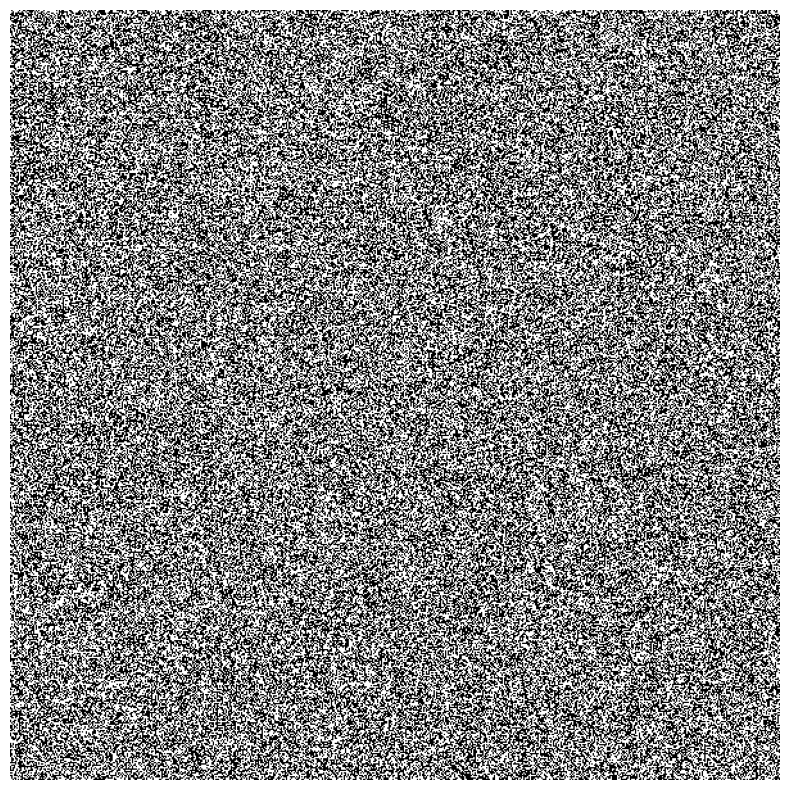

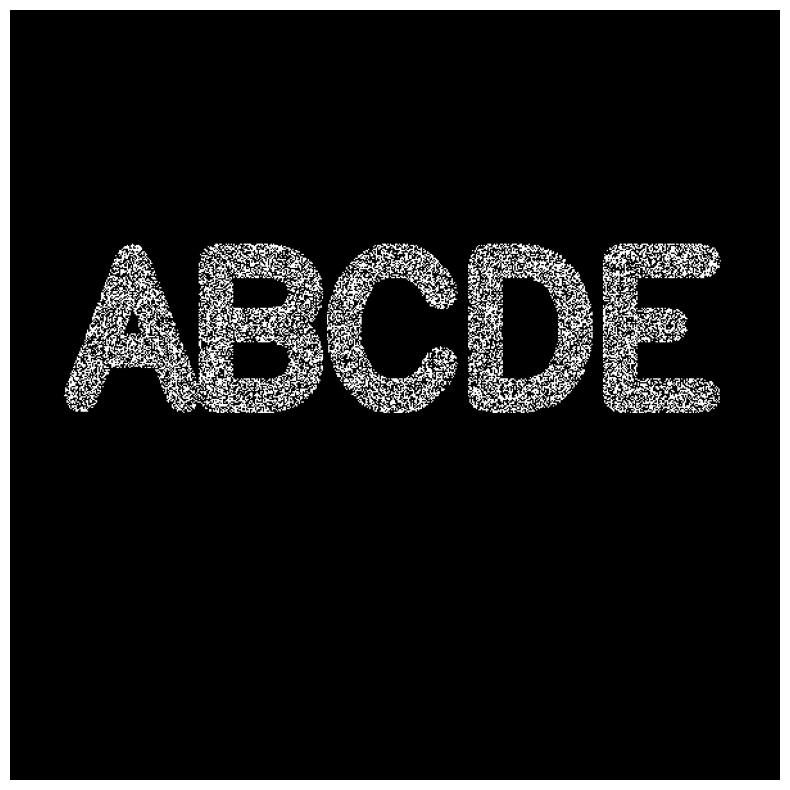

In [107]:
#now adding noise in forground

black_noise = np.random.randint(low=0, high=2, size=(600,600), dtype=np.uint8)

black_noise=black_noise*-255 #doesnt effect back nut effect forground

#-255, 255 range 255-white, 0-black

black_img =img+black_noise

#now to bring back to range 0-255

black_img[black_img==-255]=0

display_img(black_noise)
display_img(black_img)

In [108]:
black_img.min()

0

In [109]:
black_img.max()

255

## Closing

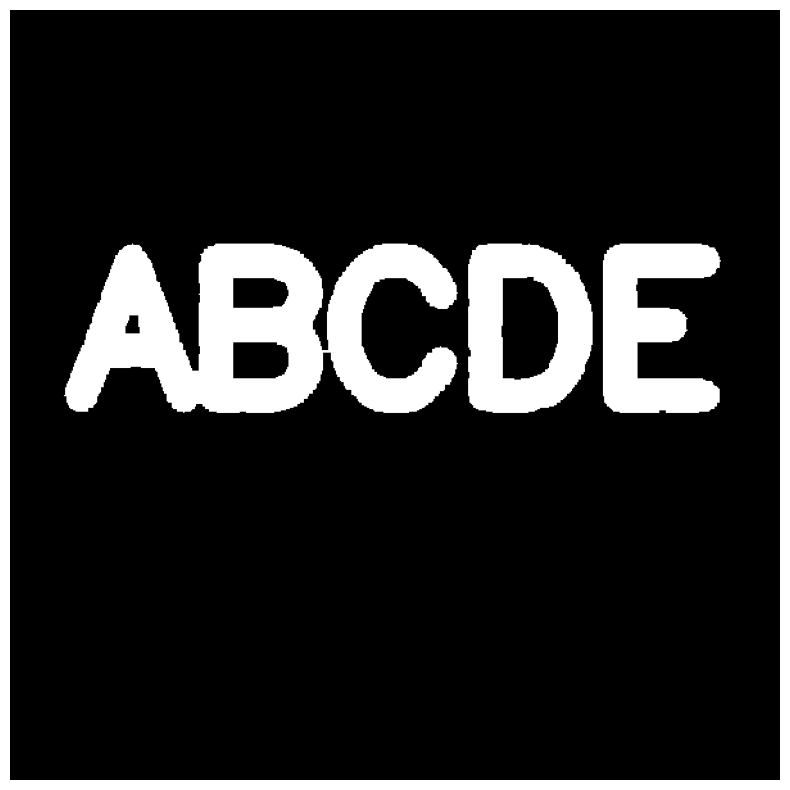

In [110]:
#to clean foreground noise.

closing = cv2.morphologyEx(black_img, cv2.MORPH_CLOSE, kernel)

display_img(closing)

## MORPHOLOGICAL GRADIENT:

In [111]:
#diff b/w erosion and dilation of image.

#method to find edge detection:(edge of forgeound next to background)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

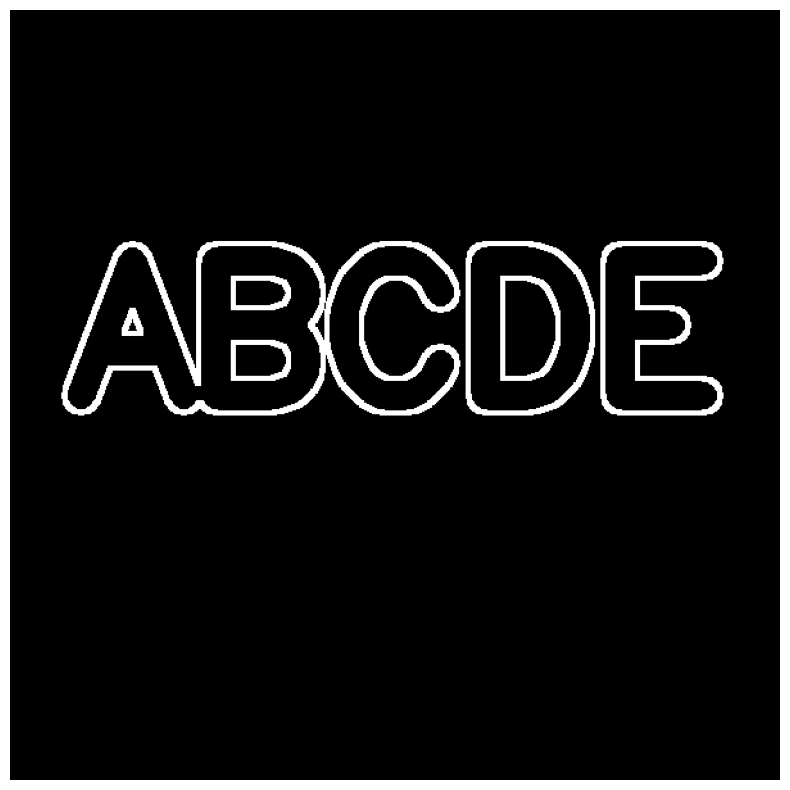

In [112]:
display_img(gradient)